<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

In [3]:
df.shape

(156, 11)

In [4]:
df.loc[pd.isnull(df.Freedom), :]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [5]:
Freedom = df.loc[~pd.isnull(df['Freedom']), :]
Freedom = Freedom['Freedom']

In [6]:
Positive_affect = df.loc[~pd.isnull(df['Positive affect']), :]
Positive_affect = Positive_affect['Positive affect']

In [7]:
Freedom.shape

(155,)

In [8]:
Positive_affect.shape

(155,)

Посмотреть первые несколько рядов таблицы

In [9]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

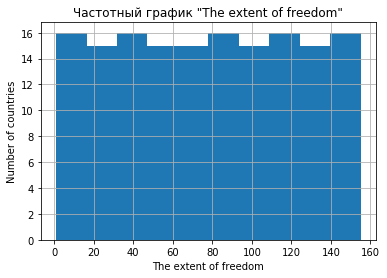

In [10]:
n, bins, patches = plt.hist(Freedom, 10)

plt.xlabel('The extent of freedom')
plt.ylabel('Number of countries')
plt.title('Частотный график "The extent of freedom"')
plt.grid(True)
plt.show()

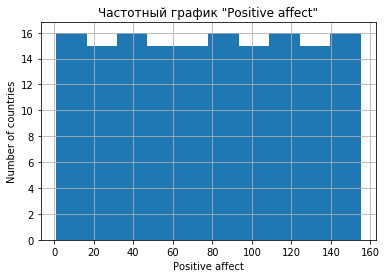

In [11]:
n, bins, patches = plt.hist(Positive_affect, 10)

plt.xlabel('Positive affect')
plt.ylabel('Number of countries')
plt.title('Частотный график "Positive affect"')
plt.grid(True)
plt.show()

##### На обоих графиках можно увидеть, что показатели "Степень свободы" и "Положетельный эффект" имеют равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [12]:
print('Медиана: ', statistics.median(Freedom))

Медиана:  78.0


In [13]:
print('Значение моды: ', statistics.mode(Freedom))

StatisticsError: no unique mode; found 155 equally common values

In [14]:
print('Математическое ожидание: ', Freedom.mean())

Математическое ожидание:  78.0


In [15]:
print('Минимум: ', Freedom.min())

Минимум:  1.0


In [16]:
print('Минимум: ', Freedom.max())

Минимум:  155.0


In [17]:
print('Стандартное отклонение: ', statistics.pstdev(Freedom))

Стандартное отклонение:  44.74371464239419


In [18]:
print('Дисперсия: ', statistics.pvariance(Freedom))

Дисперсия:  2002.0


In [19]:
Freedom_range = Freedom.max() - Freedom.min()
print('Размах: ', Freedom_range)

Размах:  154.0


Почему нельзя найти моду?

##### Выброс был один - у страны Катар по ряду показателей не было данных, поэтому эта страна была исключена из выборки. Мода не находится, потому что все значения в столбце Freedom уникальные.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

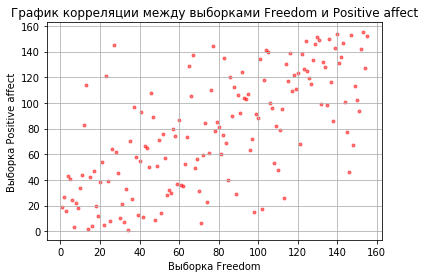

In [20]:
plt.xlabel('Выборка Freedom')
plt.ylabel('Выборка Positive affect')
plt.title('График корреляции между выборками Freedom и Positive affect')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.', c='red', alpha=0.5)

In [21]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Freedom, Positive_affect)
print(corr)

0.6817698430601657


##### Знак корреляции говорит нам о том, что корреляция прямая

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [29]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_norm = min_max_scaler.fit_transform(np.array(Freedom).reshape(-1, 1))
print(min(Freedom_norm))
print(max(Freedom_norm))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

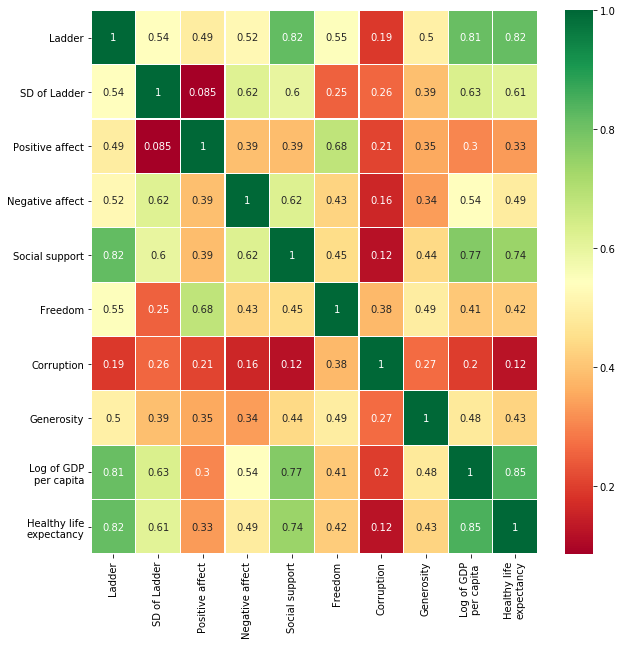

In [30]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Загрузить таблицу цен на авокадо: 

In [31]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_av=pd.read_csv(url)
df_av[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

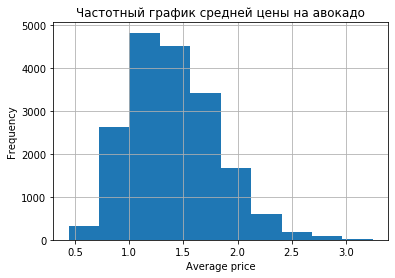

In [52]:
plt.hist(df_av['AveragePrice'], 10)
plt.xlabel('Average price')
plt.ylabel('Frequency')
plt.title('Частотный график средней цены на авокадо')
plt.grid(True)
plt.show()

##### Нормальное распределение скошенное вправо

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [33]:
df_av_sample = df_av[['4046', '4225', '4770', 'AveragePrice']]

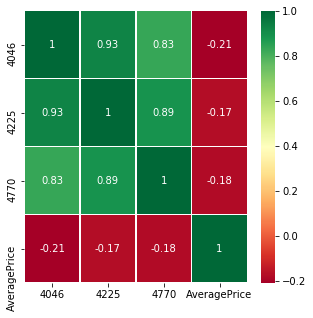

In [53]:
ax = sns.heatmap(df_av_sample.corr(), annot=True, linewidths=.5, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### Колонки 4046, 4225 и 4770 коррелируют между собой - при увеличении спроса на один сорт авокадо соответственно растет спрос и на другие сорта. Но при этом на спрос практически не влияет изменение средней цены.